# Independent Samples t-Test
### Dataset: Invisibility Cloak

This study examines whether wearing an **Invisibility Cloak** affects the **number of mischievous acts** performed by participants.

**Variables:**
- `Cloak`: 0 = Without cloak, 1 = With cloak  
- `Mischief`: Number of mischievous acts committed


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Invisibility Cloak.csv")

data.head()

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6


## Assumption 1: Independence of Observations

Each participant belongs to only one group (either with or without a cloak).  
This assumption is satisfied based on the dataset design.

## Assumption 2: Normality
I check whether the dependent variable (`Mischief`) is normally distributed for each group.
I use the **Shapiro–Wilk test** for normality.

In [ ]:
group0 = data[data['Cloak'] == 0]['Mischief']
group1 = data[data['Cloak'] == 1]['Mischief']

print("Without cloak:", stats.shapiro(group0))
print("With cloak:", stats.shapiro(group1))

Without cloak: ShapiroResult(statistic=np.float64(0.9127634937409539), pvalue=np.float64(0.2314459072953191))
With cloak: ShapiroResult(statistic=np.float64(0.9726166907872743), pvalue=np.float64(0.9361892037703956))


If p > 0.05 → each group is approximately normally distributed.

## Assumption 3: Homogeneity of Variances
I test if both groups have equal variances using **Levene’s Test**.

In [ ]:
stats.levene(group0, group1)

LeveneResult(statistic=np.float64(0.2697547683923706), pvalue=np.float64(0.6086825890641905))

If p > 0.05 → the variances are equal (use `equal_var=True` in the t-test).

## Assumption 4: Measurement Level
The dependent variable (`Mischief`) is **continuous (ratio scale)**.  
This assumption is satisfied.

## Assumption 5: No Significant Outliers
I use a boxplot to visually check for extreme outliers.


/tmp/ipython-input-2201847733.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cloak", y="Mischief", data=data, palette="Set2")


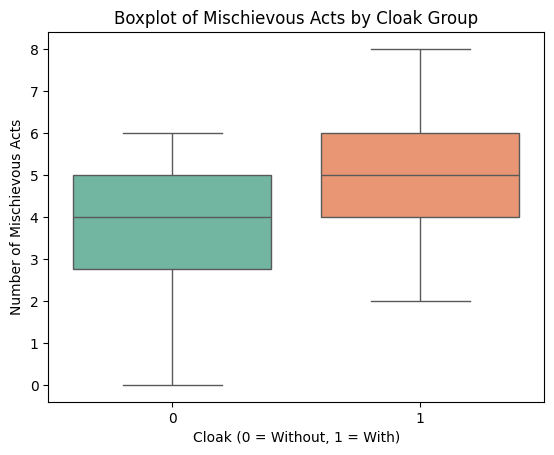

In [ ]:
sns.boxplot(x="Cloak", y="Mischief", data=data, palette="Set2")
plt.title("Boxplot of Mischievous Acts by Cloak Group")
plt.xlabel("Cloak (0 = Without, 1 = With)")
plt.ylabel("Number of Mischievous Acts")
plt.show()

## Computation: Independent Samples t-test
I perform the **independent samples t-test** to check if there is a significant difference
in the mean number of mischievous acts between participants with and without a cloak.

In [ ]:
t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=True)
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

T-statistic: -1.713
P-value: 0.101


## Results and Interpretation
If **p < 0.05**, we reject the null hypothesis (there *is* a significant difference).  
If **p ≥ 0.05**, we fail to reject the null hypothesis (there is *no* significant difference).

Also, I check the group means to interpret the direction of difference.


In [ ]:
print("Mean (Without Cloak):", group0.mean())
print("Mean (With Cloak):", group1.mean())

Mean (Without Cloak): 3.75
Mean (With Cloak): 5.0
